# Definations and Working Environment Configurations

In [3]:
import sympy as sp
import numpy as np
import hashlib
import matplotlib.pyplot as plt
sp.init_printing(use_unicode=False, wrap_line=True)

class u:#(l,m,p,q):
    def __init__(self,l,m,p,q):
        self.string = 'u'
        self.string+='l'
        if l > 0:
            self.string+=str(int(l))
        elif l == 0:
            pass
        elif l< 0 :
            self.string+='n'+str(-int(l))
        else:
            raise ValueError('l should be integer')
        self.string+='m'
        if m > 0:
            self.string+=str(int(m))
        elif m == 0:
            pass
        elif m< 0 :
            self.string+='n'+str(-int(m))
        else:
            raise ValueError('m should be integer')
        if p == 'A':
            self.string+='A'
        elif p == 'B':
            self.string+='B'
        else:
            raise ValueError('p should be char "A" or "B"')
        if q == 'x':
            self.string+='x'
        elif q == 'y':
            self.string+='y'
        else:
            raise ValueError('q should be char "x" or "y"')
        self.sym = sp.Symbol(self.string)
        self.l = l
        self.m = m
        self.p = p
        self.q = q
    def __eq__(self,other):
        if other.sym == self.sym and other.l == self.l and other.m == self.m and other.p == self.p\
        and other.q == self.q:
            return True
        else:
            return False
    def __hash__(self):
        hash_object = hashlib.md5(self.string.encode())
        return int(hash_object.hexdigest(),16)

class uv_class: #uv_class: u_vector class. Keep track on all u's appeared in the whole process for the differentiation later
    Ax_list = set()
    Ay_list = set()
    Bx_list = set()
    By_list = set()
    def u_vector(self,l,m,p):
        ux = u(l,m,p,'x')
        uy = u(l,m,p,'y')
        if p == 'A':
            self.Ax_list.add(ux)
            self.Ay_list.add(uy)
        elif p == 'B':
            self.Bx_list.add(ux)
            self.By_list.add(uy)
        else:
            raise ValueError('p should be char "A" or "B"')        
        return sp.Matrix([ux.sym,uy.sym])

def R(l,m,p,a1,a2):
    '''
    p should be string 'A' or 'B'
    '''
    if p == 'A':
        return l*a1 + m*a2 + A
    elif p == 'B':
        return l*a1 + m*a2 + B
    else:
        raise ValueError("p should be string 'A' or 'B'")
    
def potential_function(uv,R1,R2,R3,R1A_lm,R1B_lm,R2A_lm,R2B_lm,R3A_lm,R3B_lm):
    U = sp.Integer(0)
    for l0 in [-1,0,1]: # You have to explore nearby expression of U(l,m), eg. U(l,m+1) may also have terms of ulmAx,...
        for m0 in [-1,0,1]: # For current system, explore nearest l,m neighbors are enough. You can explore more but final result remains the same.
            delta1 = (1/a*R1.T*(uv.u_vector(l0+R1A_lm[0],m0+R1A_lm[1],'A')-uv.u_vector(l0+R1B_lm[0],m0+R1B_lm[1],'B')))[0]
            delta2 = (1/a*R2.T*(uv.u_vector(l0+R2A_lm[0],m0+R2A_lm[1],'A')-uv.u_vector(l0+R2B_lm[0],m0+R2B_lm[1],'B')))[0]
            delta3 = (1/a*R3.T*(uv.u_vector(l0+R3A_lm[0],m0+R3A_lm[1],'A')-uv.u_vector(l0+R3B_lm[0],m0+R3B_lm[1],'B')))[0]
            U += K/2*(delta1**2+delta2**2+delta3**2)
            if l0 ==0 and m0 == 0:
                U_single = K/2*(delta1**2+delta2**2+delta3**2)
    return U,U_single

def force_constant_matrix(uv,U):
    UAx = sp.simplify(sp.expand(sp.diff(U,u(0,0,'A','x').sym)))
    UAy = sp.simplify(sp.expand(sp.diff(U,u(0,0,'A','y').sym)))
    UBx = sp.simplify(sp.expand(sp.diff(U,u(0,0,'B','x').sym)))
    UBy = sp.simplify(sp.expand(sp.diff(U,u(0,0,'B','y').sym)))

    #FORCE CONSTANT MATRIX 'theta'
    theta = [[[] for j in range(4)] for i in range(4)]
    for i,l1 in enumerate([UAx,UAy,UBx,UBy]):
        for j,l2 in enumerate([uv.Ax_list,uv.Ay_list,uv.Bx_list,uv.By_list]):
            for ele in l2:
                coeff = sp.diff(l1,ele.sym)

                if coeff!=0:
                    l = ele.l
                    m = ele.m
                    theta[i][j].append([coeff,l,m])
    theta_matrix = sp.Matrix(theta)
    return theta   


        
def dynamical_matrix(theta,a1,a2):      
    D = [[None for j in range(4)] for i in range(4)]
    p_list = ['A','A','B','B']
    q_list = ['x','y','x','y']
    for i in range(len(theta)):
        p = p_list[i]
    #     q = q_list[i]
        for j in range(len(theta[i])):
            pp = p_list[j] #pp: p prime
    #         qp = q_list[j]
            result = sp.Integer(0)
            for ele in theta[i][j]:
                coeff,lp,mp = ele
                result += 1/mass*coeff*sp.exp(-sp.I*(k*(R(0,0,p,a1=a1,a2=a2)-R(lp,mp,pp,a1=a1,a2=a2)))[0])
            D[i][j]=result
    D_matrix = sp.Matrix(D)
    return D_matrix


def line_plot(e1,e2,e3,e4,kx_min,ky_min,kx_max,ky_max,N=100):
    k_list = []
    e1_list = []
    e2_list = []
    e3_list = []
    e4_list = []
    for i in range(N):
        kx = (kx_max-kx_min)/N*i+kx_min
        ky = (ky_max-ky_min)/N*i+ky_min
        kx_plot = (kx_max-kx_min)/N*i
        ky_plot = (ky_max-ky_min)/N*i
        k_list.append(np.sqrt(kx_plot**2+ky_plot**2))
        e1_value = float(sp.re(sp.sqrt(sp.N(e1.subs('kx',kx).subs('ky',ky)))))
        e2_value = float(sp.re(sp.sqrt(sp.N(e2.subs('kx',kx).subs('ky',ky)))))
        e3_value = float(sp.re(sp.sqrt(sp.N(e3.subs('kx',kx).subs('ky',ky)))))
        e4_value = float(sp.re(sp.sqrt(sp.N(e4.subs('kx',kx).subs('ky',ky)))))
        e1_value,e2_value,e3_value,e4_value = sorted([e1_value,e2_value,e3_value,e4_value])
        e1_list.append(e1_value)
        e2_list.append(e2_value)
        e3_list.append(e3_value)
        e4_list.append(e4_value)
    return k_list,e1_list,e2_list,e3_list,e4_list

def contour_plot(e1,e2,e3,e4,kx_min,ky_min,kx_max,ky_max,N=20):
    kx_list = []
    ky_list = []
    e1_list = []
    e2_list = []
    e3_list = []
    e4_list = []
    for i in range(N):
        print(i+1,'/',N)
        kx = (kx_max-kx_min)/N*i+kx_min
        kx_list.append(kx)
        e1_list.append([])
        e2_list.append([])
        e3_list.append([])
        e4_list.append([])
        for j in range(N):
            ky = (ky_max-ky_min)/N*j+ky_min
            if i == 0:
                ky_list.append(ky)
            e1_value = float(sp.re(sp.sqrt(sp.N(e1.subs('kx',kx).subs('ky',ky)))))
            e2_value = float(sp.re(sp.sqrt(sp.N(e2.subs('kx',kx).subs('ky',ky)))))
            e3_value = float(sp.re(sp.sqrt(sp.N(e3.subs('kx',kx).subs('ky',ky)))))
            e4_value = float(sp.re(sp.sqrt(sp.N(e4.subs('kx',kx).subs('ky',ky)))))
            e1_value,e2_value,e3_value,e4_value = sorted([e1_value,e2_value,e3_value,e4_value])
            e1_list[-1].append(e1_value)
            e2_list[-1].append(e2_value)
            e3_list[-1].append(e3_value)
            e4_list[-1].append(e4_value)
    return kx_list,ky_list,e1_list,e2_list,e3_list,e4_list

def D_eigen_expressions(D_matrix):
    D_matrix_k =  D_matrix#.subs('K',K).subs('m',mass).subs('a',a)
    return list(sp.Matrix(D_matrix_k).eigenvals().keys())

def solver_reciprocal(a1,a2):
    b1x = sp.Symbol('b1x')
    b1y = sp.Symbol('b1y')
    b2x = sp.Symbol('b2x')
    b2y = sp.Symbol('b2y')
    b1 = sp.Matrix([b1x,b1y])
    b2 = sp.Matrix([b2x,b2y])
    result = sp.solve([(a1.T*b1)[0]-2*sp.pi,(a2.T*b2)[0]-2*sp.pi,(a1.T*b2)[0],(a2.T*b1)[0]],b1x,b1y,b2x,b2y)
    b1_result = sp.Matrix([result[sp.Symbol('b1x')],result[sp.Symbol('b1y')]])
    b2_result = sp.Matrix([result[sp.Symbol('b2x')],result[sp.Symbol('b2y')]])
    return b1_result,b2_result

def delta_function(l,m):
    if l == 0:
        ls = ''
    elif l > 0:
        ls = '+'+str(int(l))
    elif l<0:
        ls = str(int(l))
    if m == 0:
        ms = ''
    elif m > 0:
        ms = '+'+str(int(m))
    elif m<0:
        ms = str(int(m))
    string = '\delta_{l'+ls+',l\'}'+'\delta_{m'+ms+',m\'}'
    return sp.Symbol(string)

def display_theta_matrix(theta):
    theta_matrix = sp.zeros(4)
    for i in range(len(theta)):
        for j in range(len(theta[i])):
            for ele in theta[i][j]:
                coeff,l,m = ele
                theta_matrix[i,j]+=coeff*delta_function(l,m)
    return sp.simplify(theta_matrix)

def substitute_values(e1_expression,e2_expression,e3_expression,e4_expression,a,K,mass):
    e1 = e1_expression.subs('K',K).subs('m',mass).subs('a',a)
    e2 = e2_expression.subs('K',K).subs('m',mass).subs('a',a)
    e3 = e3_expression.subs('K',K).subs('m',mass).subs('a',a)
    e4 = e4_expression.subs('K',K).subs('m',mass).subs('a',a)
    return e1,e2,e3,e4

def cm2w(wavenumber,c_light = 299792458):
    return 2*np.pi*c_light*wavenumber*100

def w2cm(omega,c_light = 299792458):
    return omega/(2*np.pi*c_light*100)

# Core Analytical Derivations

In [4]:
#G LOBAL SYMBOLS and CONFIGURATIONS:
a = sp.Symbol('a')
K = sp.Symbol('K')
mass = sp.Symbol('m')
k = sp.Matrix([sp.Symbol('kx'),sp.Symbol('ky')]).T

# LATTICE VECTORS AND BASIS VECTORS:

# a1 = sp.Matrix([3/2*a,sp.sqrt(3)/2*a])
# a2 = sp.Matrix([3/2*a,-sp.sqrt(3)/2*a])
# A = sp.Matrix([0,0])
# B = a*sp.Matrix([1,0])
a1 = sp.Matrix([3*a/2,sp.sqrt(3)/2*a])
a2 = sp.Matrix([3*a/2,-sp.sqrt(3)/2*a])
A = sp.Matrix([2*a,0])
B = a*sp.Matrix([0,0])

# RECIPROCAL LATTICS VECTORS
b1,b2 = solver_reciprocal(a1,a2)

# CALCULATION SYMBOL GENERATOR AND COUNTER
uv = uv_class() 

# NEAREST CONNECTING VECTORS
# R1 = sp.Matrix([a/2,sp.sqrt(3)*a/2])
# R2 = sp.Matrix([a/2,-sp.sqrt(3)*a/2])
# R3 = sp.Matrix([-a,0])

# R1A_lm=[1,0] # This means Atom A for distance 1 is in lattice (l,m)
# R1B_lm=[0,0] # This means Atom B for distance 1 is in latt ice (l-1,m)
# R2A_lm=[0,1]
# R2B_lm=[0,0]
# R3A_lm=[0,0]
# R3B_lm=[0,0]

R1 = sp.Matrix([-a/2,-sp.sqrt(3)*a/2])
R2 = sp.Matrix([-a/2,sp.sqrt(3)*a/2])
R3 = sp.Matrix([a,0])

R1A_lm=[0,0] # This means Atom A for distance 1 is in lattice (l,m)
R1B_lm=[0,1] # This means Atom B for distance 1 is in latt ice (l-1,m)
R2A_lm=[0,0]
R2B_lm=[1,0]
R3A_lm=[0,0]
R3B_lm=[1,1]

U,U_single = potential_function(uv,R1,R2,R3,R1A_lm,R1B_lm,R2A_lm,R2B_lm,R3A_lm,R3B_lm)

theta = force_constant_matrix(uv,U)
theta_matrix = display_theta_matrix(theta)

# DYNAMICAL MATRIX 'D'
D_matrix = dynamical_matrix(theta,a1,a2)  

# GET ANAYLITICAL EXPRESSION FOR EIGENVALUES

e1_expression,e2_expression,e3_expression,e4_expression = D_eigen_expressions(D_matrix)


In [158]:
theta_matrix

[                                                                             
[                                   3*K*\delta_{l,l'}\delta_{m,m'}            
[                                   ------------------------------            
[                                                 2                           
[                                                                             
[                                                                             
[                                                                             
[                                                 0                           
[                                                                             
[                                                                             
[                                                                             
[-K*(\delta_{l,l'}\delta_{m-1,m'} + \delta_{l-1,l'}\delta_{m,m'} + 4*\delta_{l
[---------------------------------------------------

In [159]:
D_matrix

[                                                                             
[                                                                             
[                                                                             
[                                                                             
[                                  3*K                                        
[                                  ---                                        
[                                  2*m                                        
[                                                                             
[                                                                             
[                                                                             
[                                                                             
[                                                                             
[                                                   

In [162]:
mass_value*3.20220766e14**2

In [198]:
K_value

# Numerical Calculations and Graphs

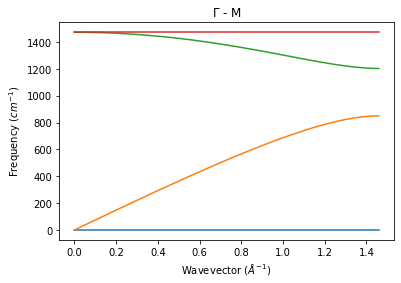

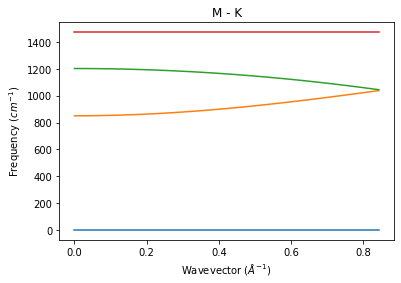

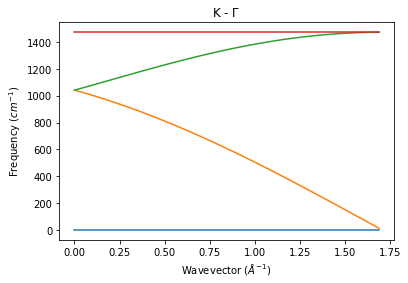

In [185]:
# a_value = 1
# K_value = 1
# mass_value = 1

a_value = 2.46e-10/np.sqrt(3)
mass_value = 1.9944235e-26/2
omega = cm2w(wavenumber=1700/2)
K_value = mass_value*omega**2

e1,e2,e3,e4 = substitute_values(e1_expression,e2_expression,e3_expression,e4_expression,a = a_value,K = K_value,mass = mass_value)

#GAMMA TO M
kx_min = 0
ky_min = 0
kx_max = 2*np.pi/3/a_value
ky_max = 0
k_list, e1_list,e2_list,e3_list,e4_list = line_plot(e1,e2,e3,e4,kx_min,ky_min,kx_max,ky_max,N=100)
Gamma2M = k_list, e1_list,e2_list,e3_list,e4_list

plt.figure()
plt.title('$\Gamma$ - M')
plt.xlabel('Wavevector ($\AA^{-1}$)')
plt.ylabel('Frequency ($cm^{-1}$)')
plt.plot([item/1e10 for item in k_list],[w2cm(item) for item in e1_list])
plt.plot([item/1e10 for item in k_list],[w2cm(item) for item in e2_list])
plt.plot([item/1e10 for item in k_list],[w2cm(item) for item in e3_list])
plt.plot([item/1e10 for item in k_list],[w2cm(item) for item in e4_list])

#M TO K
kx_min = 2*np.pi/3/a_value
ky_min = 0
kx_max = 2*np.pi/3/a_value
ky_max = 2*np.sqrt(3)*np.pi/9/a_value
k_list, e1_list,e2_list,e3_list,e4_list = line_plot(e1,e2,e3,e4,kx_min,ky_min,kx_max,ky_max,N=100)
M2K = k_list, e1_list,e2_list,e3_list,e4_list

plt.figure()
plt.title('M - K')
plt.xlabel('Wavevector ($\AA^{-1}$)')
plt.ylabel('Frequency ($cm^{-1}$)')
plt.plot([item/1e10 for item in k_list],[w2cm(item) for item in e1_list])
plt.plot([item/1e10 for item in k_list],[w2cm(item) for item in e2_list])
plt.plot([item/1e10 for item in k_list],[w2cm(item) for item in e3_list])
plt.plot([item/1e10 for item in k_list],[w2cm(item) for item in e4_list])


#K TO GAMMA
kx_min = 2*np.pi/3/a_value
ky_min = 2*np.sqrt(3)*np.pi/9/a_value
kx_max = 0
ky_max = 0
k_list, e1_list,e2_list,e3_list,e4_list = line_plot(e1,e2,e3,e4,kx_min,ky_min,kx_max,ky_max,N=100)
K2Gamma = k_list, e1_list,e2_list,e3_list,e4_list

plt.figure()
plt.title('K - $\Gamma$')
plt.xlabel('Wavevector ($\AA^{-1}$)')
plt.ylabel('Frequency ($cm^{-1}$)')
plt.plot([item/1e10 for item in k_list],[w2cm(item) for item in e1_list])
plt.plot([item/1e10 for item in k_list],[w2cm(item) for item in e2_list])
plt.plot([item/1e10 for item in k_list],[w2cm(item) for item in e3_list])
plt.plot([item/1e10 for item in k_list],[w2cm(item) for item in e4_list])



In [184]:
np.sqrt(K_value/mass_value)*1.8

# Combined graph of phonon dispersion along  $\Gamma$-M-K-$\Gamma$

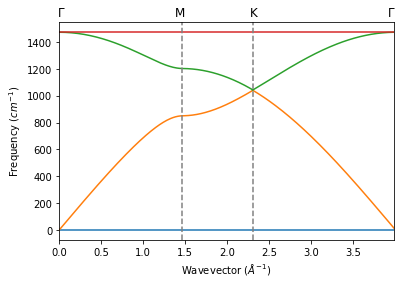

In [186]:
# GAMMA-M-K-GAMMA
b1 = Gamma2M[0][-1]
b2 = Gamma2M[0][-1]+M2K[0][-1]
k_list = Gamma2M[0]+[item+b1 for item in M2K[0]] + [item+b2 for item in K2Gamma[0]]
e1_list = Gamma2M[1]+M2K[1]+K2Gamma[1]
e2_list = Gamma2M[2]+M2K[2]+K2Gamma[2]
e3_list = Gamma2M[3]+M2K[3]+K2Gamma[3]
e4_list = Gamma2M[4]+M2K[4]+K2Gamma[4]

plt.figure()
plt.title('$\Gamma$                             M                 K                                  $\Gamma$')
plt.xlabel('Wavevector ($\AA^{-1}$)')
plt.ylabel('Frequency ($cm^{-1}$)')
plt.plot([item/1e10 for item in k_list],[w2cm(item) for item in e1_list])
plt.plot([item/1e10 for item in k_list],[w2cm(item) for item in e2_list])
plt.plot([item/1e10 for item in k_list],[w2cm(item) for item in e3_list])
plt.plot([item/1e10 for item in k_list],[w2cm(item) for item in e4_list])

e_max = w2cm(np.max([e1_list,e2_list,e3_list,e4_list]))
e_min = w2cm(np.min([e1_list,e2_list,e3_list,e4_list]))

plt.plot([b1/1e10,b1/1e10],[e_min-0.05*(e_max-e_min),e_max+0.05*(e_max-e_min)],'--',color='gray')
plt.plot([b2/1e10,b2/1e10],[e_min-0.05*(e_max-e_min),e_max+0.05*(e_max-e_min)],'--',color='gray')

plt.ylim(e_min-0.05*(e_max-e_min),e_max+0.05*(e_max-e_min))
plt.xlim(k_list[0]/1e10,k_list[-1]/1e10)

# Contour graph of dispersion in the whole k-space

In [187]:
kx_min = -4*np.sqrt(3)*np.pi/9/a_value
ky_min = -4*np.sqrt(3)*np.pi/9/a_value
kx_max = 4*np.sqrt(3)*np.pi/9/a_value
ky_max = 4*np.sqrt(3)*np.pi/9/a_value
kx_list_contour,ky_list_contour,e1_list_contour,e2_list_contour,e3_list_contour,e4_list_contour = contour_plot(e1,e2,e3,e4,kx_min,ky_min,kx_max,ky_max,N=100)

1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100
57 / 100
58 / 100
59 / 100
60 / 100
61 / 100
62 / 100
63 / 100
64 / 100
65 / 100
66 / 100
67 / 100
68 / 100
69 / 100
70 / 100
71 / 100
72 / 100
73 / 100
74 / 100
75 / 100
76 / 100
77 / 100
78 / 100
79 / 100
80 / 100
81 / 100
82 / 100
83 / 100
84 / 100
85 / 100
86 / 100
87 / 100
88 / 100
89 / 100
90 / 100
91 / 100
92 / 100
93 / 100
94 / 100
95 / 100
96 / 100
97 / 100
98 / 100
99 / 100
100 / 100


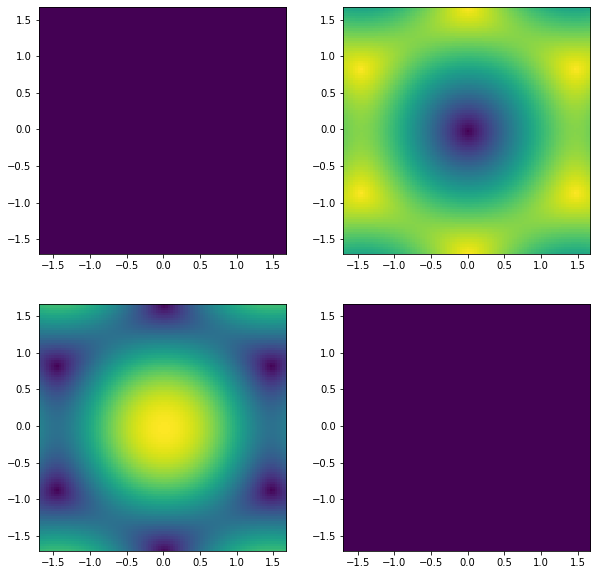

In [188]:
extent = [kx_list_contour[0]/1e10,kx_list_contour[-1]/1e10,ky_list_contour[0]/1e10,ky_list_contour[-1]/1e10]
plt.figure(figsize=(10,10))
ax = plt.subplot(221)
ax.imshow(w2cm(np.asarray(e1_list_contour)).T,extent=extent)
ax = plt.subplot(222)
ax.imshow(w2cm(np.asarray(e2_list_contour)).T,extent=extent)
ax = plt.subplot(223)
ax.imshow(w2cm(np.asarray(e3_list_contour)).T,extent=extent)
ax = plt.subplot(224)
ax.imshow(w2cm(np.asarray(e4_list_contour)).T,extent=extent)

# Cropped contour for first Brillouin zone

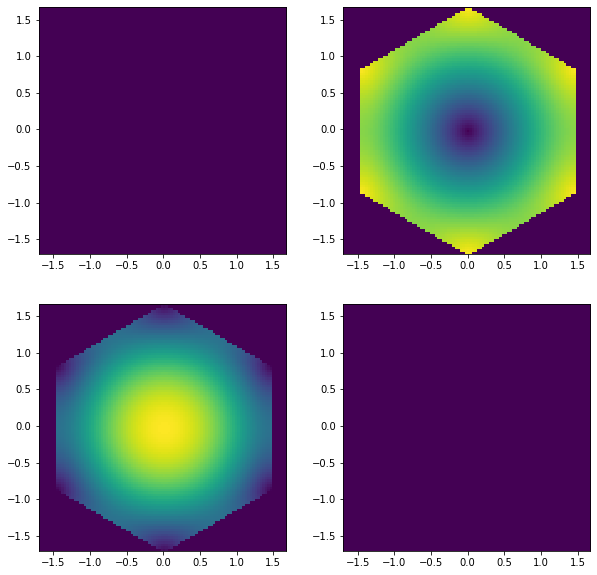

In [189]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import copy

def crop(kx_list_contour,ky_list_contour,e1_list,e2_list,e3_list,e4_list):
    e1_cropped = copy.deepcopy(e1_list)
    e2_cropped = copy.deepcopy(e2_list)
    e3_cropped = copy.deepcopy(e3_list)
    e4_cropped = copy.deepcopy(e4_list)

    b = (0,-4*np.sqrt(3)*np.pi/9/a_value)
    rb = (2*np.pi/3/a_value,-2*np.sqrt(3)*np.pi/9/a_value)
    rt = ((2*np.pi/3/a_value,2*np.sqrt(3)*np.pi/9/a_value))
    t = (0,4*np.sqrt(3)*np.pi/9/a_value)
    lt = (-2*np.pi/3/a_value,2*np.sqrt(3)*np.pi/9/a_value)
    lb = (-2*np.pi/3/a_value,-2*np.sqrt(3)*np.pi/9/a_value)
    polygon = Polygon([b,rb,rt,t,lt,lb])
    e1_min = np.min(e1_list)
    e2_min = np.min(e2_list)
    e3_min = np.min(e3_list)
    e4_min = np.min(e4_list)
    for i in range(len(kx_list_contour)):
        for j in range(len(ky_list_contour)):
            point = Point(kx_list_contour[i],ky_list_contour[j])
            if not polygon.contains(point):
                e1_cropped[i][j] = e1_min
                e2_cropped[i][j] = e2_min
                e3_cropped[i][j] = e3_min
                e4_cropped[i][j] = e4_min
    return e1_cropped,e2_cropped,e3_cropped,e4_cropped

e1_cropped,e2_cropped,e3_cropped,e4_cropped = crop(kx_list_contour,ky_list_contour,e1_list_contour,e2_list_contour,e3_list_contour,e4_list_contour)
extent = [kx_list_contour[0]/1e10,kx_list_contour[-1]/1e10,ky_list_contour[0]/1e10,ky_list_contour[-1]/1e10]
plt.figure(figsize=(10,10))
ax = plt.subplot(221)
ax.imshow(np.asarray(e1_cropped).T,extent=extent)
ax = plt.subplot(222)
ax.imshow(np.asarray(e2_cropped).T,extent=extent)
ax = plt.subplot(223)
ax.imshow(np.asarray(e3_cropped).T,extent=extent)
ax = plt.subplot(224)
ax.imshow(np.asarray(e4_cropped).T,extent=extent)

# Density of states

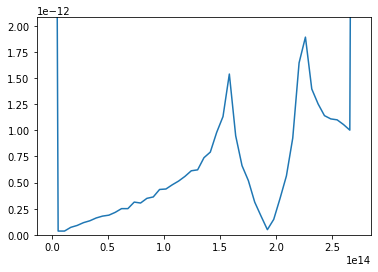

In [194]:
def dos(kx_list_contour,ky_list_contour,e1_list,e2_list,e3_list,e4_list,V=1):
    w_max = np.max([e1_list,e2_list,e3_list,e4_list])
    w_min = np.min([e1_list,e2_list,e3_list,e4_list])
    w_list = np.linspace(w_min,w_max,50)
    dw = w_list[1]-w_list[0]
    density_list = np.zeros(w_list.shape)
    
    b = (0,-4*np.sqrt(3)*np.pi/9/a_value)
    rb = (2*np.pi/3/a_value,-2*np.sqrt(3)*np.pi/9/a_value)
    rt = ((2*np.pi/3/a_value,2*np.sqrt(3)*np.pi/9/a_value))
    t = (0,4*np.sqrt(3)*np.pi/9/a_value)
    lt = (-2*np.pi/3/a_value,2*np.sqrt(3)*np.pi/9/a_value)
    lb = (-2*np.pi/3/a_value,-2*np.sqrt(3)*np.pi/9/a_value)
    polygon = Polygon([b,rb,rt,t,lt,lb])

    for i in range(len(kx_list_contour)):
        for j in range(len(ky_list_contour)):
            for e_list in [e1_list,e2_list,e3_list,e4_list]:
                point = Point(kx_list_contour[i],ky_list_contour[j])
                if polygon.contains(point):
                    for k in range(len(w_list)-1):
                        if k == 0:
                            if w_list[k]<=e_list[i][j]<=w_list[k+1]:
                                density_list[k]+=V/dw
                        else:
                            if w_list[k]<e_list[i][j]<=w_list[k+1]:
                                density_list[k]+=V/dw
    return w_list[:-1],density_list[:-1]

k_edge_length = 4*np.sqrt(3)*np.pi/9/a_value
V = 1/(2*np.pi)**2/2#1/(1/4*np.sqrt(5*(5+2*np.sqrt(5)))*(4*np.sqrt(3)*np.pi/9)**2)

w_list,density_list = dos(kx_list_contour,ky_list_contour,e1_list_contour,e2_list_contour,e3_list_contour,e4_list_contour,V=V)
plt.plot(w_list,density_list)
plt.ylim(0,1.1*np.max(density_list[1:-1]))

# Heat capacity

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in longdouble_scalars
  # Remove the CWD from sys.path while we load stuff.


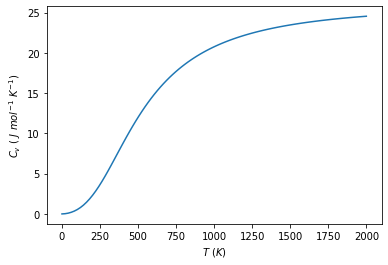

In [197]:
hbar = 1.0545718e-34
kB = 1.38064852e-23

#(1/np.pi)**2#
def cv(w_list,density_list,T,V=1,hbar=1,kB=1,NA = 6.0221409e23): #cv: Cv, heat capacity
    dw = w_list[1]-w_list[0]
    beta = 1/kB/T
    i=3
#     print(beta*hbar*w_list[i])
    cv = np.sum([V*dw*density_list[i]/kB/T**2*hbar**2*w_list[i]**2*np.exp(np.float128(beta*hbar*w_list[i]))/(np.exp(np.float128(beta*hbar*w_list[i]))-1+1e-100)**2 for i in range(len(w_list))])
    cv_mol = cv*NA
    return cv_mol
T_list = np.linspace(1,2000,100)
cv_list = []
for T in T_list:
    cv_list.append(cv(w_list,density_list,T,V=V,hbar=hbar,kB=kB))
plt.xlabel('$T\ (K)$')
plt.ylabel('$C_v\ (\ J\ mol^{-1}\ K^{-1})$')
plt.plot(T_list,cv_list)